In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
if not Path("data/raw/archive").exists():
    os.chdir("..")

print("Working directory:", os.getcwd())

models_dir = Path("checkpoints")


Working directory: d:\assigment-ai-ARIADNA-20251113\source-code-ai-ARIADNA-20251113


In [3]:
# Positions that should be 1 in TEST acccording to ME
ones_positions = [
    20, 29, 61, 77, 83, 84, 85, 87, 88, 94, 96, 99, 103, 107, 109, 111, 115, 116,
    117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
    133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 146, 147, 148, 149, 150,
    151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166,
    167, 168, 173, 174, 175
]

# Initialize an array of 180 zeros
y_val = [0] * 180

# Fill specified positions with 1
for pos in ones_positions:
    y_val[pos] = 1

In [4]:
# ====== Metrics ======
def evaluate_model(y_true, y_pred, class_names=None):
    # Convert to numpy arrays
    y_true = np.array(y_val)
    y_pred = np.array(y_pred)

    # Compute metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='binary')
    rec = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')

    # Print basic metrics
    print(f" Accuracy:  {acc:.3f}")
    print(f" Precision: {prec:.3f}")
    print(f" Recall:    {rec:.3f}")
    print(f" F1-score:  {f1:.3f}")

    # ====== Confusion Matrix ======
    cm = confusion_matrix(y_true, y_pred)
    if class_names is None:
        class_names = ["Class 0", "Class 1"]

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # ====== Classification Report ======
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    print("\n Classification Report:")
    display(df_report.style.background_gradient(cmap='Blues', axis=None))

    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "confusion_matrix": cm,
        "report": df_report
    }

In [5]:
y_pred_lf =  pd.read_csv(models_dir/'resultsLF.csv')

 Accuracy:  0.500
 Precision: 0.378
 Recall:    0.500
 F1-score:  0.430


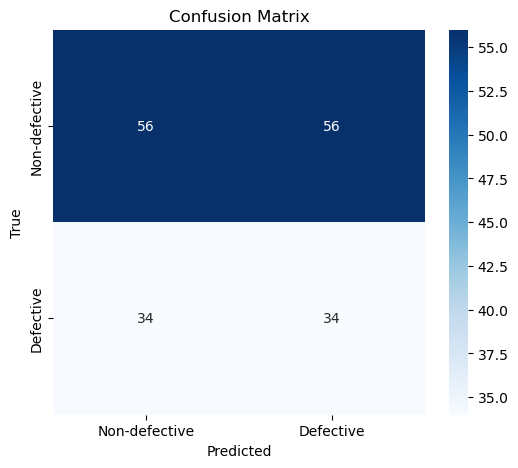


 Classification Report:


,precision,recall,f1-score,support
Non-defective,0.622222,0.500000,0.554455,112.000000
Defective,0.377778,0.500000,0.430380,68.000000
accuracy,0.500000,0.500000,0.500000,0.500000
macro avg,0.500000,0.500000,0.492418,180.000000
weighted avg,0.529877,0.500000,0.507582,180.000000


In [6]:
results = evaluate_model(y_val, y_pred_lf, class_names=["Non-defective", "Defective"])

In [7]:
y_pred_rn50 =pd.read_csv(models_dir/'resultsRN50.csv')

 Accuracy:  0.517
 Precision: 0.380
 Recall:    0.441
 F1-score:  0.408


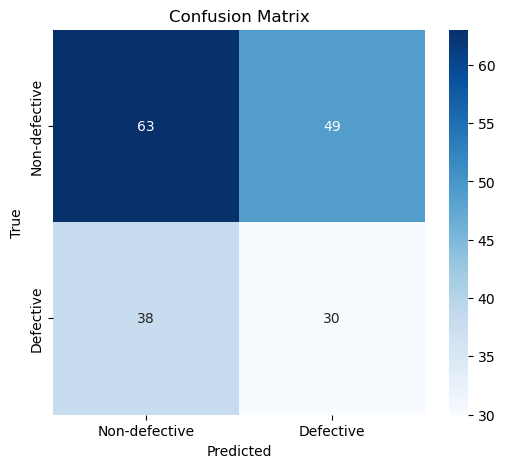


 Classification Report:


,precision,recall,f1-score,support
Non-defective,0.623762,0.562500,0.591549,112.000000
Defective,0.379747,0.441176,0.408163,68.000000
accuracy,0.516667,0.516667,0.516667,0.516667
macro avg,0.501755,0.501838,0.499856,180.000000
weighted avg,0.531579,0.516667,0.522270,180.000000


In [9]:
results = evaluate_model(y_val, y_pred_rn50, class_names=["Non-defective", "Defective"])